In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from regression import Model

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df[df['is_assistant'] == 0]

# t-test (rs:1, rw,lw,ls: 0)

In [4]:
dfb = df[df['is_assistant'] == 0].copy()

In [5]:
ride_style_map = {'rw': 0, 'lw': 0, 'rs': 1, 'ls': 0}
dfb.replace({'ride_style': ride_style_map}, inplace=True)

In [6]:
Y = dfb['ride_style']
X = dfb[['speed', 'poster', 'staff', 'time', 'is_female', 'is_raining', 'day']]
m = Model(Y, X, dummy=['day'])

In [7]:
m.regression()

Regression starts... 

Explained variable: ride_style

Adjusted R-squared: 0.006

Two-tailed t-test results:

          Name      Coef   Std Err   t-value   p-value
0   _constant_ -0.022492  0.016203 -1.388136  0.163838
1        speed -0.008733  0.003475 -2.513052  0.011852
2       poster  0.009495  0.003772  2.517312  0.011718
3        staff  0.012837  0.006590  1.947909  0.050891
4         time  0.000699  0.000331  2.110291  0.034479
5    is_female -0.001835  0.003228 -0.568345  0.567244
6   is_raining -0.022032  0.009269 -2.376864  0.017290
7      day_Tue  0.014493  0.004976  2.912235  0.003538
8      day_Wed  0.008989  0.004471  2.010589  0.043967
9      day_Thu -0.004855  0.003771 -1.287640  0.196267
10     day_Fri  0.005322  0.004240  1.255209  0.208300 


Correlation between independent variables:

               speed    poster     staff      time  is_female  is_raining  \
speed       1.000000  0.555716  0.313345  0.016927   0.004050    0.136480   
poster      0.555716  1.00000

# t-test (ls,rs:1, rw,lw:0)

In [8]:
dfc = df[df['is_assistant'] == 0].copy()

In [9]:
ride_style_map = {'rw': 0, 'lw': 0, 'rs': 1, 'ls': 1}
dfc.replace({'ride_style': ride_style_map}, inplace=True)

In [10]:
Y = dfc['ride_style']
X = dfc[['speed', 'poster', 'staff', 'time', 'is_female', 'is_raining','day']]
m = Model(Y, X, dummy=['day'])

In [11]:
m.regression()

Regression starts... 

Explained variable: ride_style

Adjusted R-squared: 0.2027

Two-tailed t-test results:

          Name      Coef   Std Err    t-value   p-value
0   _constant_  2.479334  0.054603  45.406182  0.000000
1        speed  0.010686  0.013018   0.820836  0.409845
2       poster  0.023504  0.013586   1.730063  0.082856
3        staff  0.036268  0.016342   2.219354  0.026253
4         time -0.037423  0.001119 -33.442294  0.000000
5    is_female  0.075901  0.010080   7.530016  0.000000
6   is_raining  0.063549  0.024497   2.594177  0.009362
7      day_Tue  0.043926  0.014989   2.930485  0.003339
8      day_Wed  0.050283  0.015419   3.261029  0.001095
9      day_Thu  0.042548  0.015684   2.712875  0.006596
10     day_Fri -0.029953  0.016657  -1.798247  0.071488 


Correlation between independent variables:

               speed    poster     staff      time  is_female  is_raining  \
speed       1.000000  0.555716  0.313345  0.016927   0.004050    0.136480   
poster      0.55

# Figure 1: Walk

In [12]:
dfa = df.copy()

In [13]:
# walk: 1, stand: 0
ride_style_map = {'rw': 1, 'lw': 1, 'rs': 0, 'ls': 0}
dfa.replace({'ride_style': ride_style_map}, inplace=True)

In [14]:
time = dfa[dfa['time'].duplicated() == False]['time']

ride_count = list()
for t in time:
    c = dfa[(dfa['ride_style'] == 1) & (dfa['time'] == t)]['id'].count()
    ride_count.append(c)

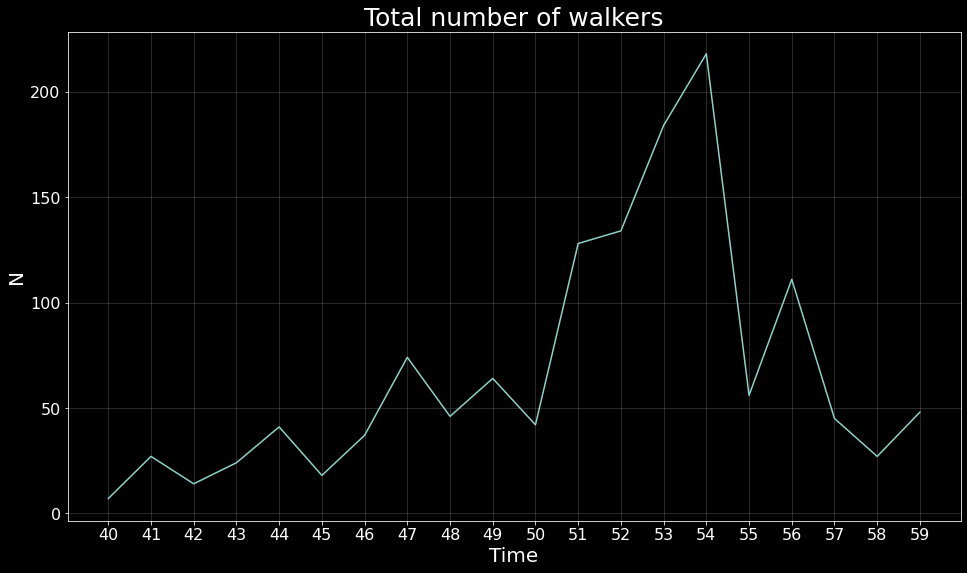

In [15]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 9))
    
    plt.title('Total number of walkers', fontsize=25)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('N', fontsize=20)
    plt.xticks(time, fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.plot(time, ride_count)
    plt.grid(alpha=0.2)
    
    plt.show()